In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('../data/stroke_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


| Columna             | Descripción                                               | Tipo / Valores posibles                                                                 |
|---------------------|-----------------------------------------------------------|-----------------------------------------------------------------------------------------|
| `gender`            | Género del paciente                                       | `Male`, `Female`                                                             |
| `age`               | Edad del paciente en años                                 | Numérico (entero o flotante)                                                           |
| `hypertension`      | ¿Tiene hipertensión?                                      | `0`: No, `1`: Sí                                                                       |
| `heart_disease`     | ¿Tiene alguna enfermedad cardíaca?                        | `0`: No, `1`: Sí                                                                       |
| `ever_married`      | ¿Alguna vez ha estado casado/a?                           | `Yes`, `No`                                                                            |
| `work_type`         | Tipo de trabajo                                            | `Private`, `Self-employed`, `Govt_job`, `children`, `Never_worked`                    |
| `Residence_type`    | Tipo de residencia                                        | `Urban`, `Rural`                                                                       |
| `avg_glucose_level` | Nivel promedio de glucosa en sangre                       | Numérico (flotante)                                                                    |
| `bmi`               | Índice de masa corporal                                   | Numérico (flotante), puede contener valores nulos                                      |
| `smoking_status`    | Estado del hábito de fumar                                | `formerly smoked`, `never smoked`, `smokes`, `Unknown`                                |
| `stroke`            | ¿Ha sufrido un accidente cerebrovascular (ictus)?         | `0`: No, `1`: Sí                                                                       |


# Análisis de datos faltantes

Valores nulos por columna:
Empty DataFrame
Columns: [Valores Nulos, Porcentaje (%)]
Index: []


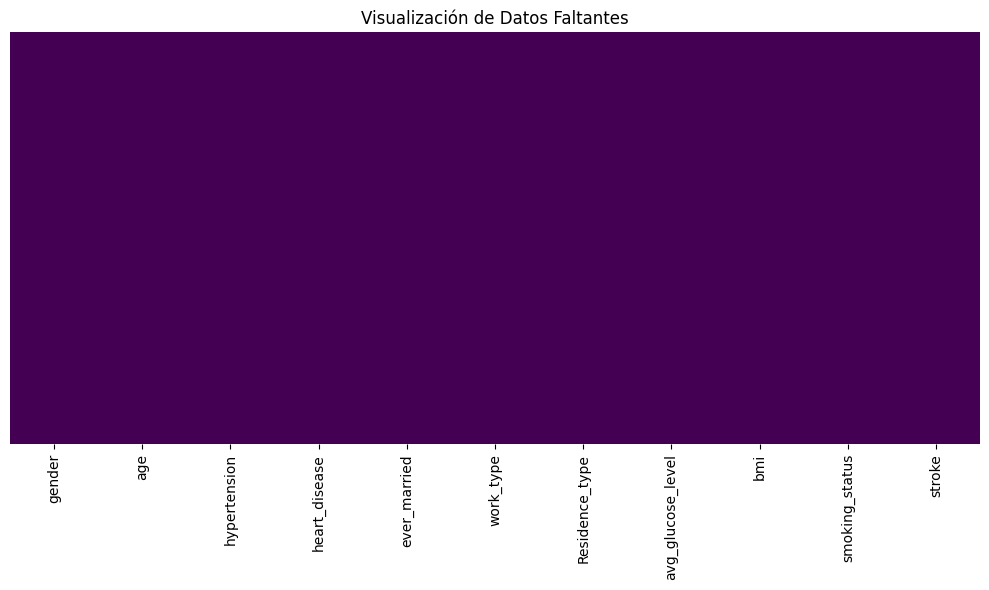

In [34]:
print("Valores nulos por columna:")
valores_nulos = df.isnull().sum()
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
info_nulos = pd.DataFrame({
    'Valores Nulos': valores_nulos,
    'Porcentaje (%)': porcentaje_nulos.round(2)
})
print(info_nulos[info_nulos['Valores Nulos'] > 0])  # Solo mostrar columnas con valores nulos

# Visualizar datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visualización de Datos Faltantes')
plt.tight_layout()
plt.show()

# Análisis general de las variables

🔢 Variables numéricas (continuas o discretas):

age (edad)

avg_glucose_level (nivel promedio de glucosa)

bmi (índice de masa corporal)

🔘 Variables categóricas binarias (0/1):
hypertension (hipertensión)

heart_disease (enfermedad cardíaca)

stroke (objetivo: ha tenido un ictus o no)

🔤 Variables categóricas nominales:
gender (género)

ever_married (alguna vez casado)

work_type (tipo de trabajo)

Residence_type (tipo de residencia)

smoking_status (estado del hábito de fumar)



In [35]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981,4981.000000,4981.000000,4981.000000,4981,4981,4981,4981.000000,4981.000000,4981,4981.000000
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2907,NaN,NaN,NaN,3280,2860,2532,NaN,NaN,1838,NaN
mean,NaN,43.419859,0.096165,0.055210,NaN,NaN,NaN,105.943562,28.498173,NaN,0.049789
std,NaN,22.662755,0.294848,0.228412,NaN,NaN,NaN,45.075373,6.790464,NaN,0.217531
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,14.000000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.230000,23.700000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.850000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,113.860000,32.600000,NaN,0.000000


# Análisis de variables numéricas

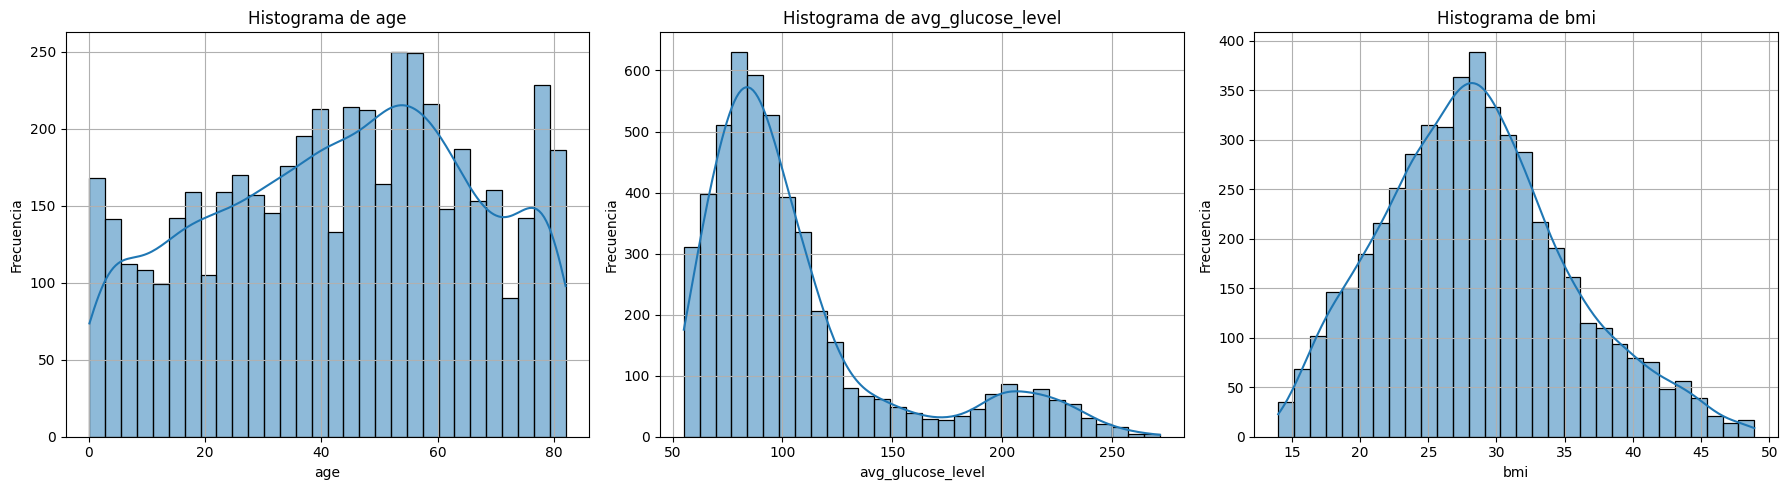

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas seleccionadas
columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

# Crear figura y ejes: 1 fila, 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterar sobre columnas y ejes
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid()

# Ajustar espacio
plt.tight_layout()
plt.show()


Vamos a graficar las variables usando el percentil 95, asi en caso de que haya outliers podremos obtener una visión mas cercana a la distribución del grueso de los datos

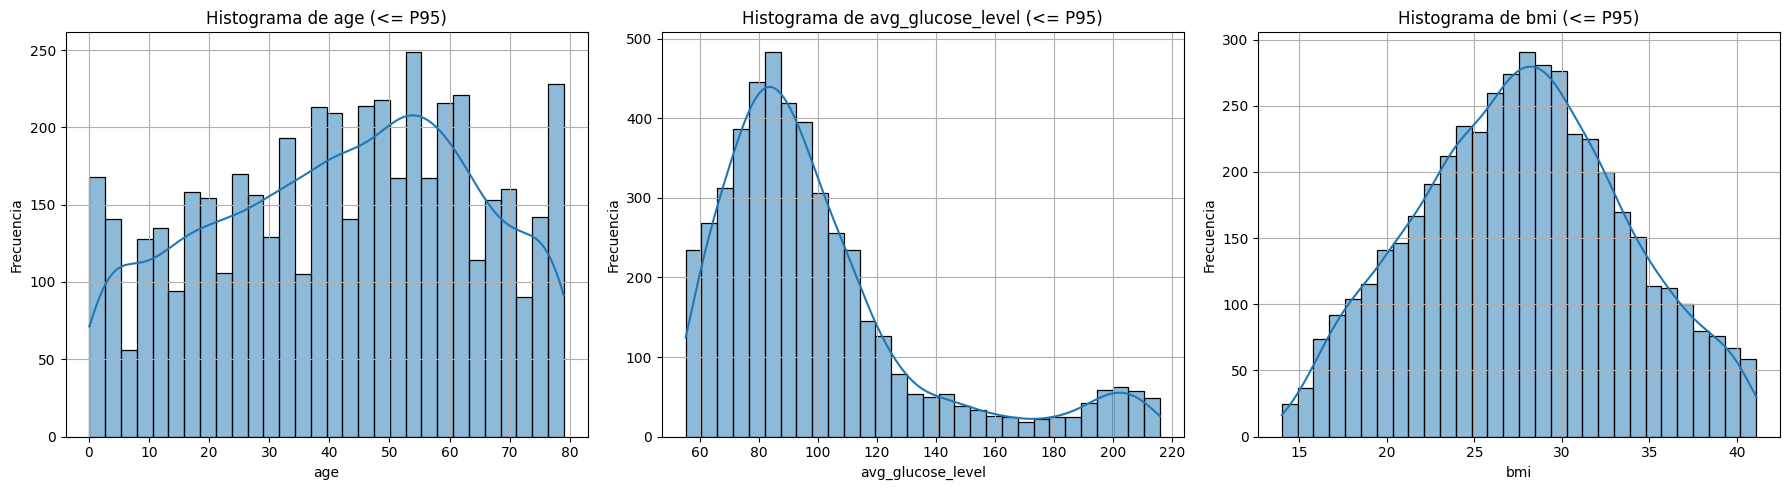

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas seleccionadas
columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

# Crear figura y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterar y graficar en subplots
for i, column in enumerate(columns_to_plot):
    # Calcular percentil 95 y filtrar
    p95 = df[column].quantile(0.95)
    filtered_data = df[df[column] <= p95]
    
    # Graficar histograma
    sns.histplot(filtered_data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histograma de {column} (<= P95)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid()

plt.tight_layout()
plt.show()


Con esta primera aproximacion de las distribuciones tanto de los datos totales como los datos usando el percentil 95, podemos observar que los gráficos a penas varían. Esto podría significar que quizá no haya una presencia de outliers significativa, sin embargo, mas tarde profundizaremos más en este punto en la sección de outliers a través de los metodos IQR y Z-Score. 



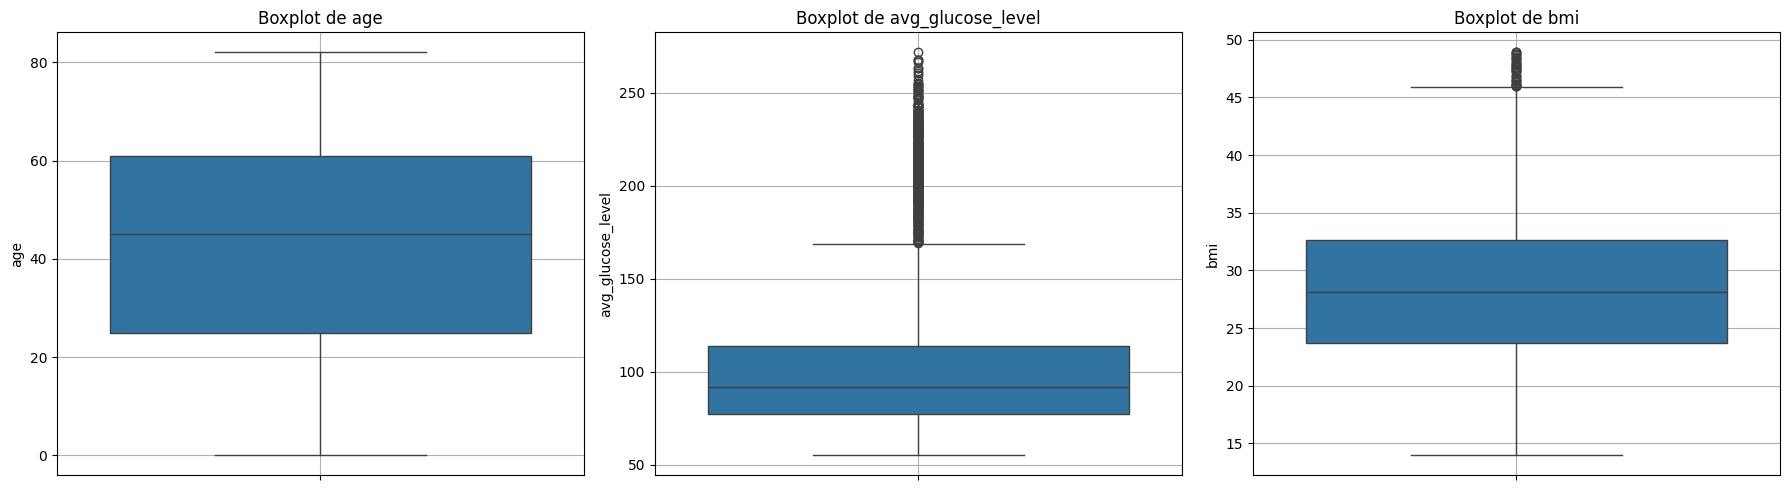

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas seleccionadas
columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

# Crear figura y ejes: 1 fila, 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterar sobre columnas y ejes para crear los boxplots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_ylabel(column)
    axes[i].grid()

# Ajustar espaciado
plt.tight_layout()
plt.show()


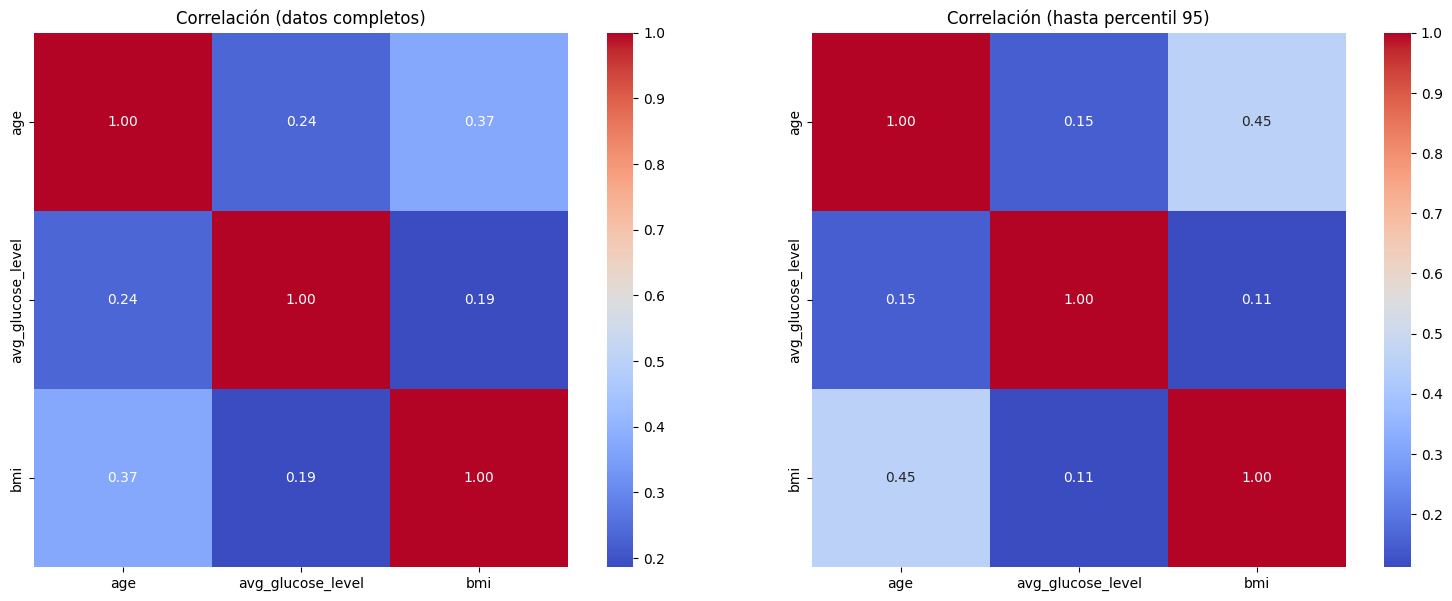

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas seleccionadas
columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

# 1. Matriz de correlación completa
corr_full = df[columns_to_plot].corr()

# 2. Filtrar por percentil 95
df_filtered = df.copy()
for col in columns_to_plot:
    p95 = df[col].quantile(0.95)
    df_filtered = df_filtered[df_filtered[col] <= p95]

# 3. Matriz de correlación filtrada
corr_filtered = df_filtered[columns_to_plot].corr()

# 4. Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap completo
sns.heatmap(corr_full, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[0])
axes[0].set_title('Correlación (datos completos)')

# Heatmap filtrado al 95 percentil
sns.heatmap(corr_filtered, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[1])
axes[1].set_title('Correlación (hasta percentil 95)')

plt.tight_layout()
plt.show()


Tal como sucedía con los histogramas, los valores de nuestra matriz a penas cambian al usar el conjunto de datos totales y el percentil 95. La matriz nos muestra que únicamente hay correlaciones positivas, todas menores de 0.50, no siendo por tanto necesario descartar ninguna variable al no haber riesgo de correlación entre las mismas. La correlación más "fuerte" sucede en el par "age"-"bmi", lo que nos indica que cuanto mayor edad mayor indice de masa coorporal se presencia.

$BMI = \frac{peso\ (kg)}{altura\ (m)^2}$

Teniendo en cuenta la siguiente formula y sabiendo como hemos mencionado anteriormente que a cuanto mas edad mayor BMI, también se puede inferir que cuanto mayor es un paciente, mayor es su peso y por tanto mayor su BMI

# Análisis de variables categoricas

In [40]:
categoric = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categoric:
    print(f"únicos en '{col}': {df[col].unique()}")

únicos en 'gender': ['Male' 'Female']
únicos en 'ever_married': ['Yes' 'No']
únicos en 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children']
únicos en 'Residence_type': ['Urban' 'Rural']
únicos en 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [41]:
for col in categoric:
    print(f"'{col}': ")
    print(f"{df[col].value_counts(normalize=True)*100}\n")

'gender': 
gender
Female    58.361775
Male      41.638225
Name: proportion, dtype: float64

'ever_married': 
ever_married
Yes    65.850231
No     34.149769
Name: proportion, dtype: float64

'work_type': 
work_type
Private          57.418189
Self-employed    16.141337
children         13.511343
Govt_job         12.929131
Name: proportion, dtype: float64

'Residence_type': 
Residence_type
Urban    50.833166
Rural    49.166834
Name: proportion, dtype: float64

'smoking_status': 
smoking_status
never smoked       36.900221
Unknown            30.114435
formerly smoked    17.406143
smokes             15.579201
Name: proportion, dtype: float64



Vemos si la variable objetivo está desbalanceada:

In [42]:
print(f"{df['stroke'].value_counts(normalize=True)*100}\n")

stroke
0    95.02108
1     4.97892
Name: proportion, dtype: float64



La variable objetivo (stroke) presenta un fuerte desbalance, por lo que se emplearán técnicas de validación estratificada y métodos para tratar el desbalance durante el modelado.

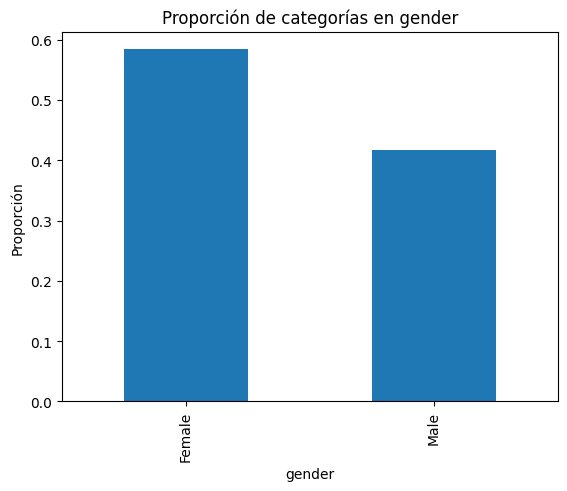

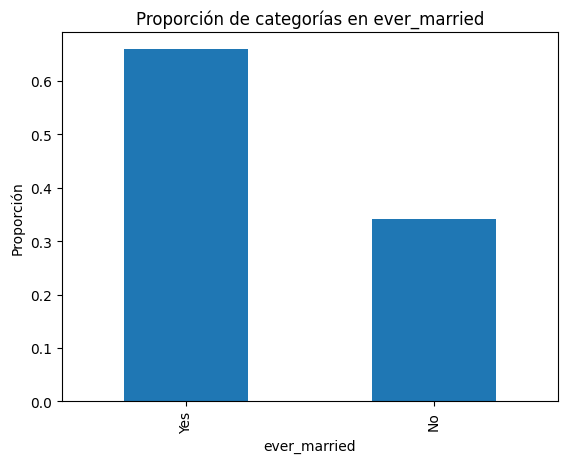

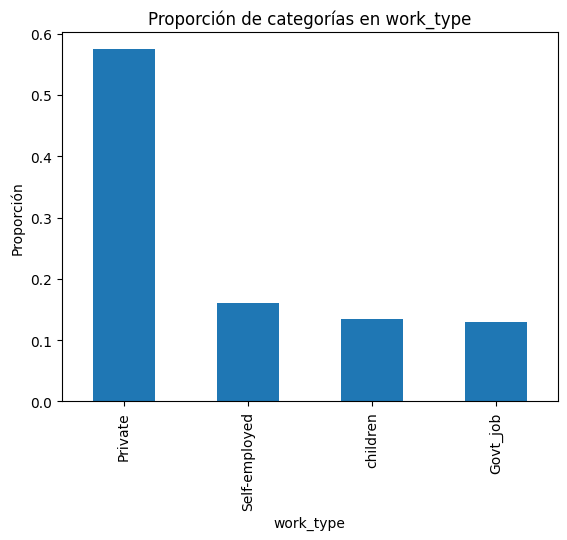

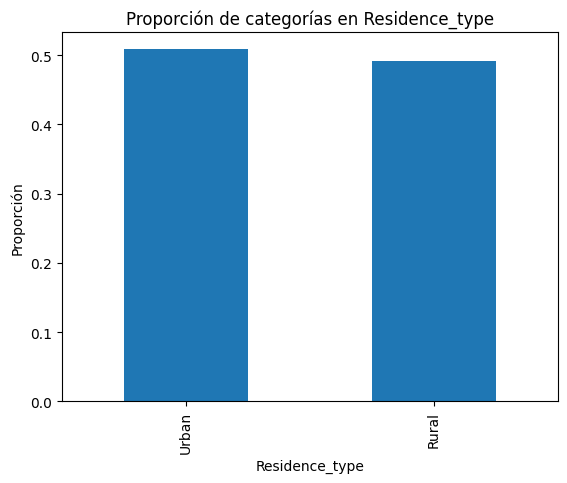

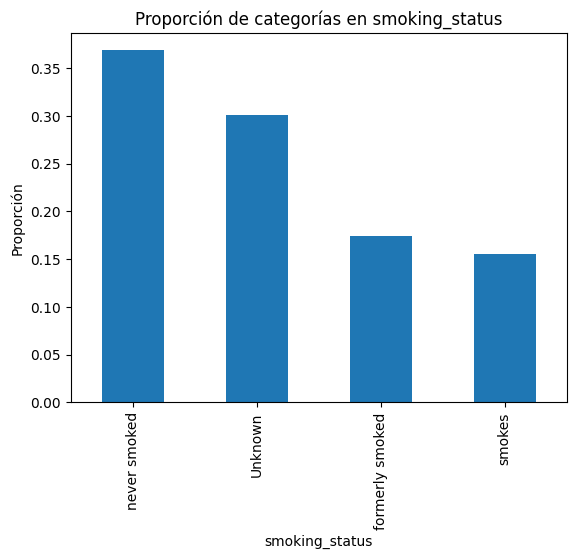

In [43]:
import matplotlib.pyplot as plt

for col in categoric:
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Proporción de categorías en {col}')
    plt.ylabel('Proporción')
    plt.xlabel(col)
    plt.show()

Las variables categóricas presentan distribuciones variadas, pero ninguna categoría tiene una proporción menor al 10%.
Las proporciones de cada categoría se visualizan mediante gráficos de barras para facilitar la interpretación.
Este análisis confirma que todas las categorías tienen suficiente representación para el modelado.

# Análisis Bivariado con la variable objetivo

## Análisis bivariado con la variable objetivo (stroke) ##


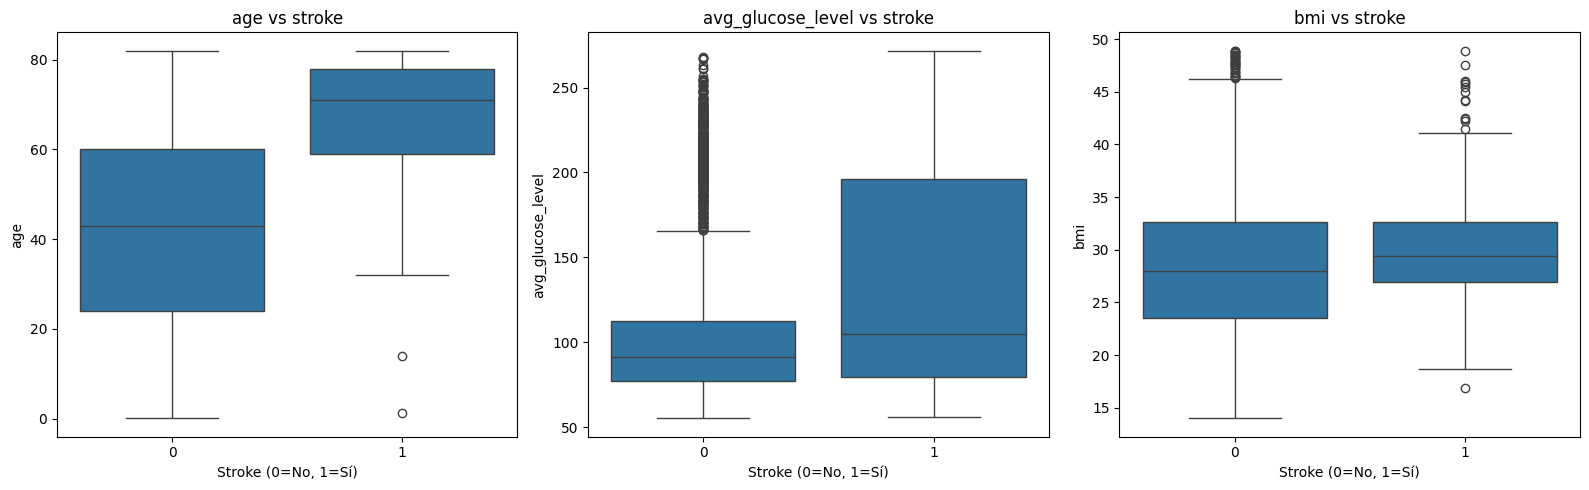

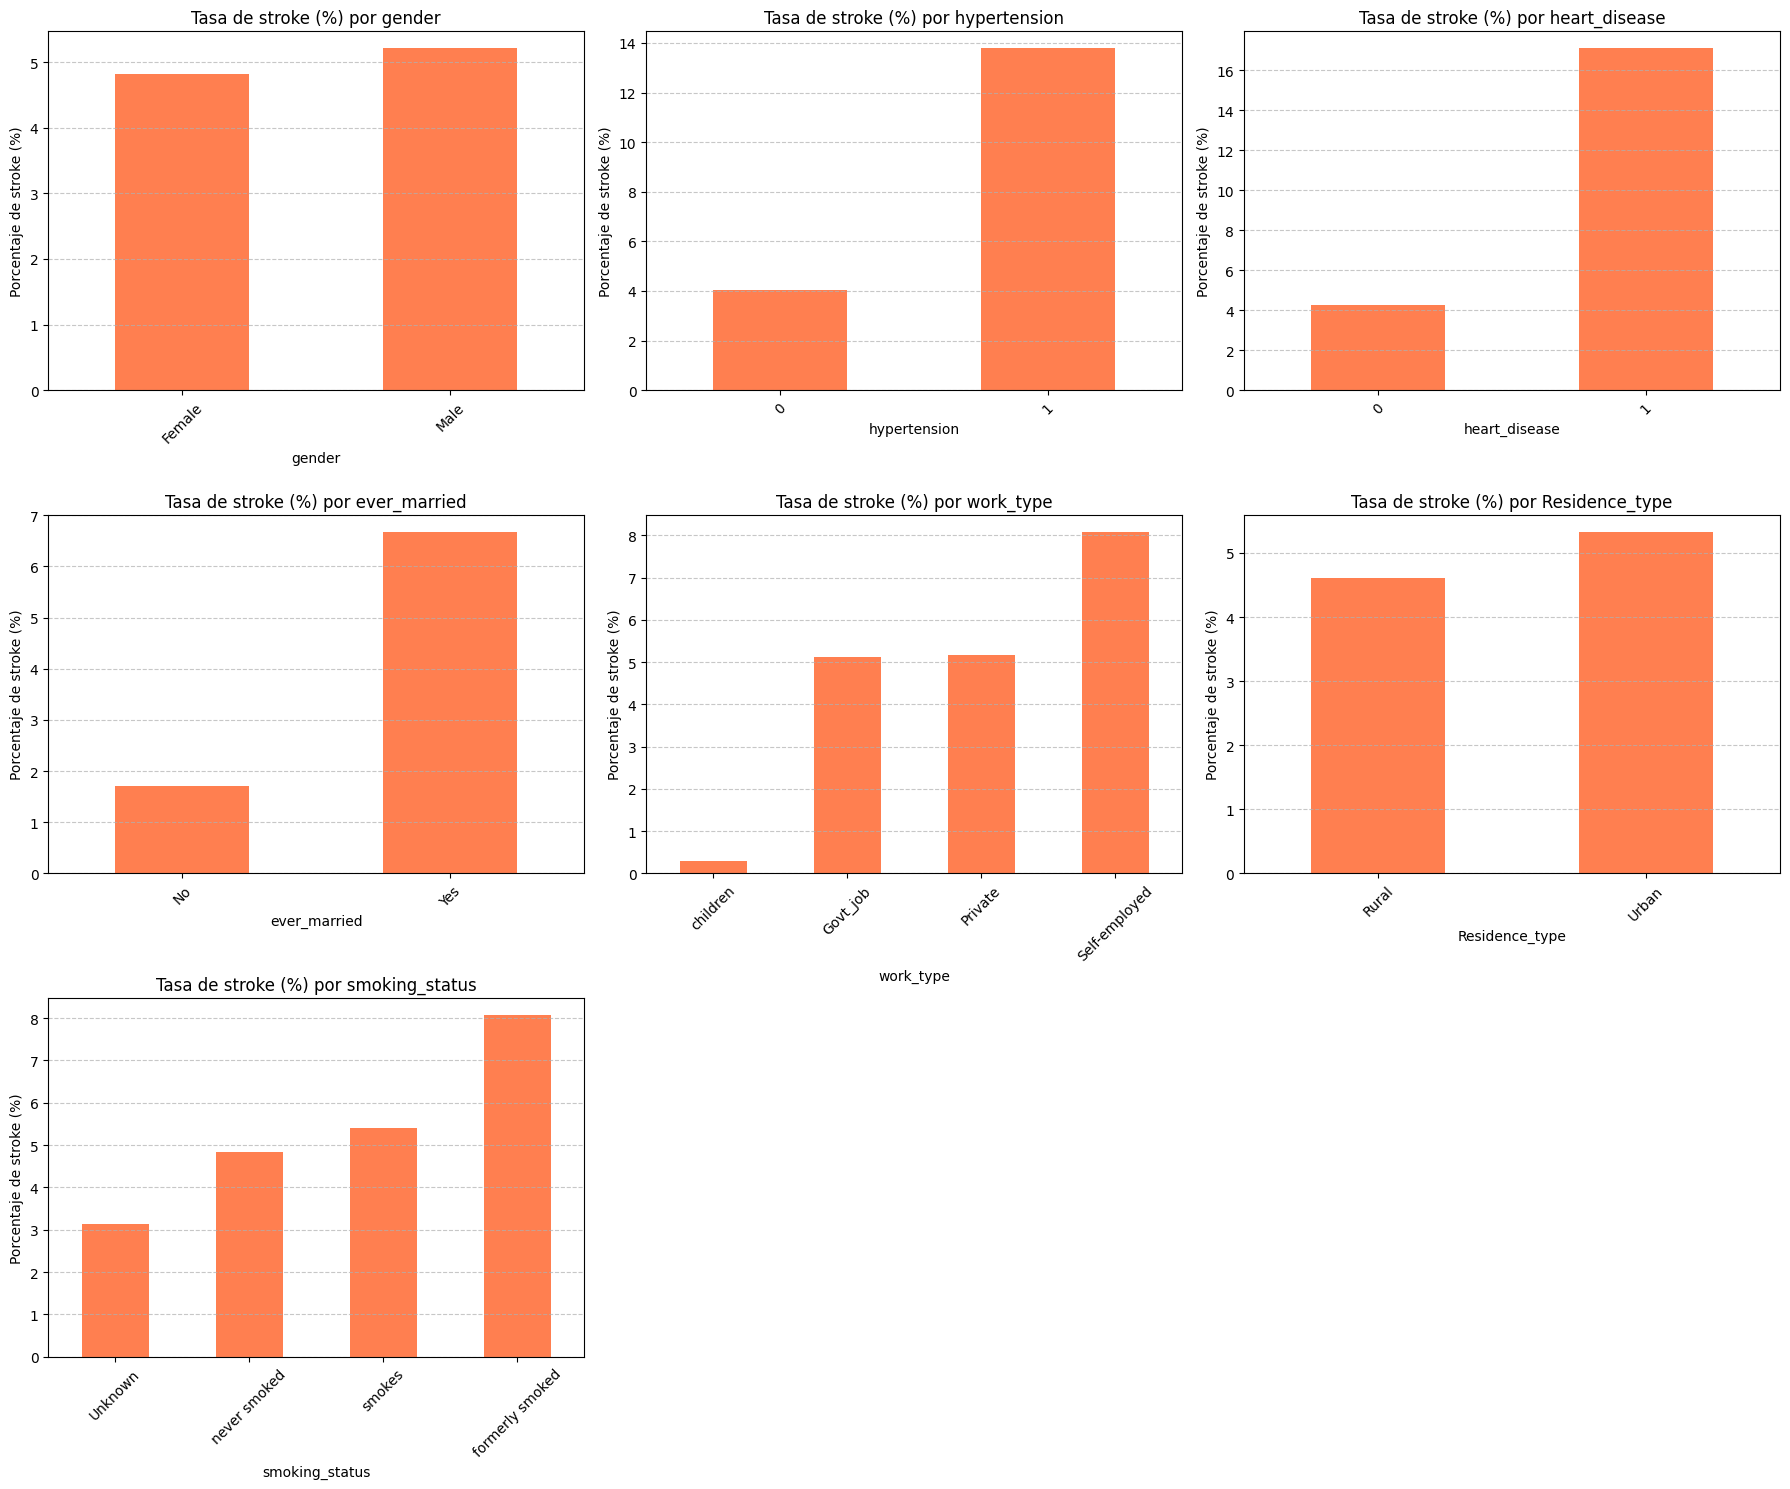

In [44]:
# Análisis bivariado: Relación entre variables y la variable objetivo (stroke)
print("## Análisis bivariado con la variable objetivo (stroke) ##")

# Variables numéricas vs. stroke
plt.figure(figsize=(16, 5))
for i, column in enumerate(['age', 'avg_glucose_level', 'bmi']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='stroke', y=column, data=df)
    plt.title(f'{column} vs stroke')
    plt.xlabel('Stroke (0=No, 1=Sí)')
plt.tight_layout()
plt.show()

# Variables categóricas vs. stroke
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                   'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(18, 15))
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i+1)
    
    # Calcular la proporción de stroke por categoría
    stroke_prop = pd.crosstab(df[var], df['stroke'], normalize='index') * 100
    
    # Graficar
    stroke_prop[1].sort_values().plot(kind='bar', color='coral')
    plt.title(f'Tasa de stroke (%) por {var}')
    plt.ylabel('Porcentaje de stroke (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Pruebas Estadísticas

In [45]:
# Pruebas estadísticas para evaluar diferencias significativas
from scipy.stats import chi2_contingency, mannwhitneyu

print("## Pruebas estadísticas ##")

# Prueba Mann-Whitney U para variables numéricas (alternativa no paramétrica a t-test)
numeric_tests = {}
for column in ['age', 'avg_glucose_level', 'bmi']:
    # Separar datos según stroke
    group_0 = df[df['stroke'] == 0][column].dropna()
    group_1 = df[df['stroke'] == 1][column].dropna()
    
    # Realizar prueba estadística
    stat, p_value = mannwhitneyu(group_0, group_1)
    numeric_tests[column] = {
        'estadístico': stat,
        'p_valor': p_value,
        'significativo': p_value < 0.05
    }

print("Resultados para variables numéricas (Mann-Whitney U):")
for var, result in numeric_tests.items():
    print(f"{var}: p-valor = {result['p_valor']:.6f} - {'Significativo' if result['significativo'] else 'No significativo'}")

# Chi-cuadrado para variables categóricas
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                   'work_type', 'Residence_type', 'smoking_status']

categorical_tests = {}
for var in categorical_vars:
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(df[var], df['stroke'])
    
    # Realizar prueba chi-cuadrado
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    categorical_tests[var] = {
        'chi2': chi2,
        'p_valor': p_value,
        'significativo': p_value < 0.05
    }

print("\nResultados para variables categóricas (Chi-cuadrado):")
for var, result in categorical_tests.items():
    print(f"{var}: p-valor = {result['p_valor']:.6f} - {'Significativo' if result['significativo'] else 'No significativo'}")

## Pruebas estadísticas ##
Resultados para variables numéricas (Mann-Whitney U):
age: p-valor = 0.000000 - Significativo
avg_glucose_level: p-valor = 0.000000 - Significativo
bmi: p-valor = 0.000011 - Significativo

Resultados para variables categóricas (Chi-cuadrado):
gender: p-valor = 0.575528 - No significativo
hypertension: p-valor = 0.000000 - Significativo
heart_disease: p-valor = 0.000000 - Significativo
ever_married: p-valor = 0.000000 - Significativo
work_type: p-valor = 0.000000 - Significativo
Residence_type: p-valor = 0.271793 - No significativo
smoking_status: p-valor = 0.000003 - Significativo


Explicación: Este código aplica pruebas estadísticas para determinar si existen diferencias significativas entre los grupos con y sin stroke. Para variables numéricas utilizamos la prueba Mann-Whitney U (una alternativa no paramétrica al t-test, adecuada cuando no podemos asumir distribución normal). Para variables categóricas, empleamos la prueba Chi-cuadrado que evalúa la independencia entre variables. Un p-valor menor a 0.05 indica una diferencia estadísticamente significativa, sugiriendo que esa variable puede ser importante para predecir strokes.

Variables Significativas (p < 0.05):
- **Todas las variables numéricas** (age, avg_glucose_level, bmi) son estadísticamente significativas
- **La mayoría de variables categóricas** (hypertension, heart_disease, ever_married, work_type, smoking_status)
Variables No Significativas:
- **gender** y **Residence_type** - Estas variables no muestran diferencias estadísticamente significativas entre grupos con y sin stroke
**Interpretación:** Esto indica que tienes variables muy predictivas en tu dataset, lo cual es excelente para el modelado posterior.

# V de cramer de variables categóricas 

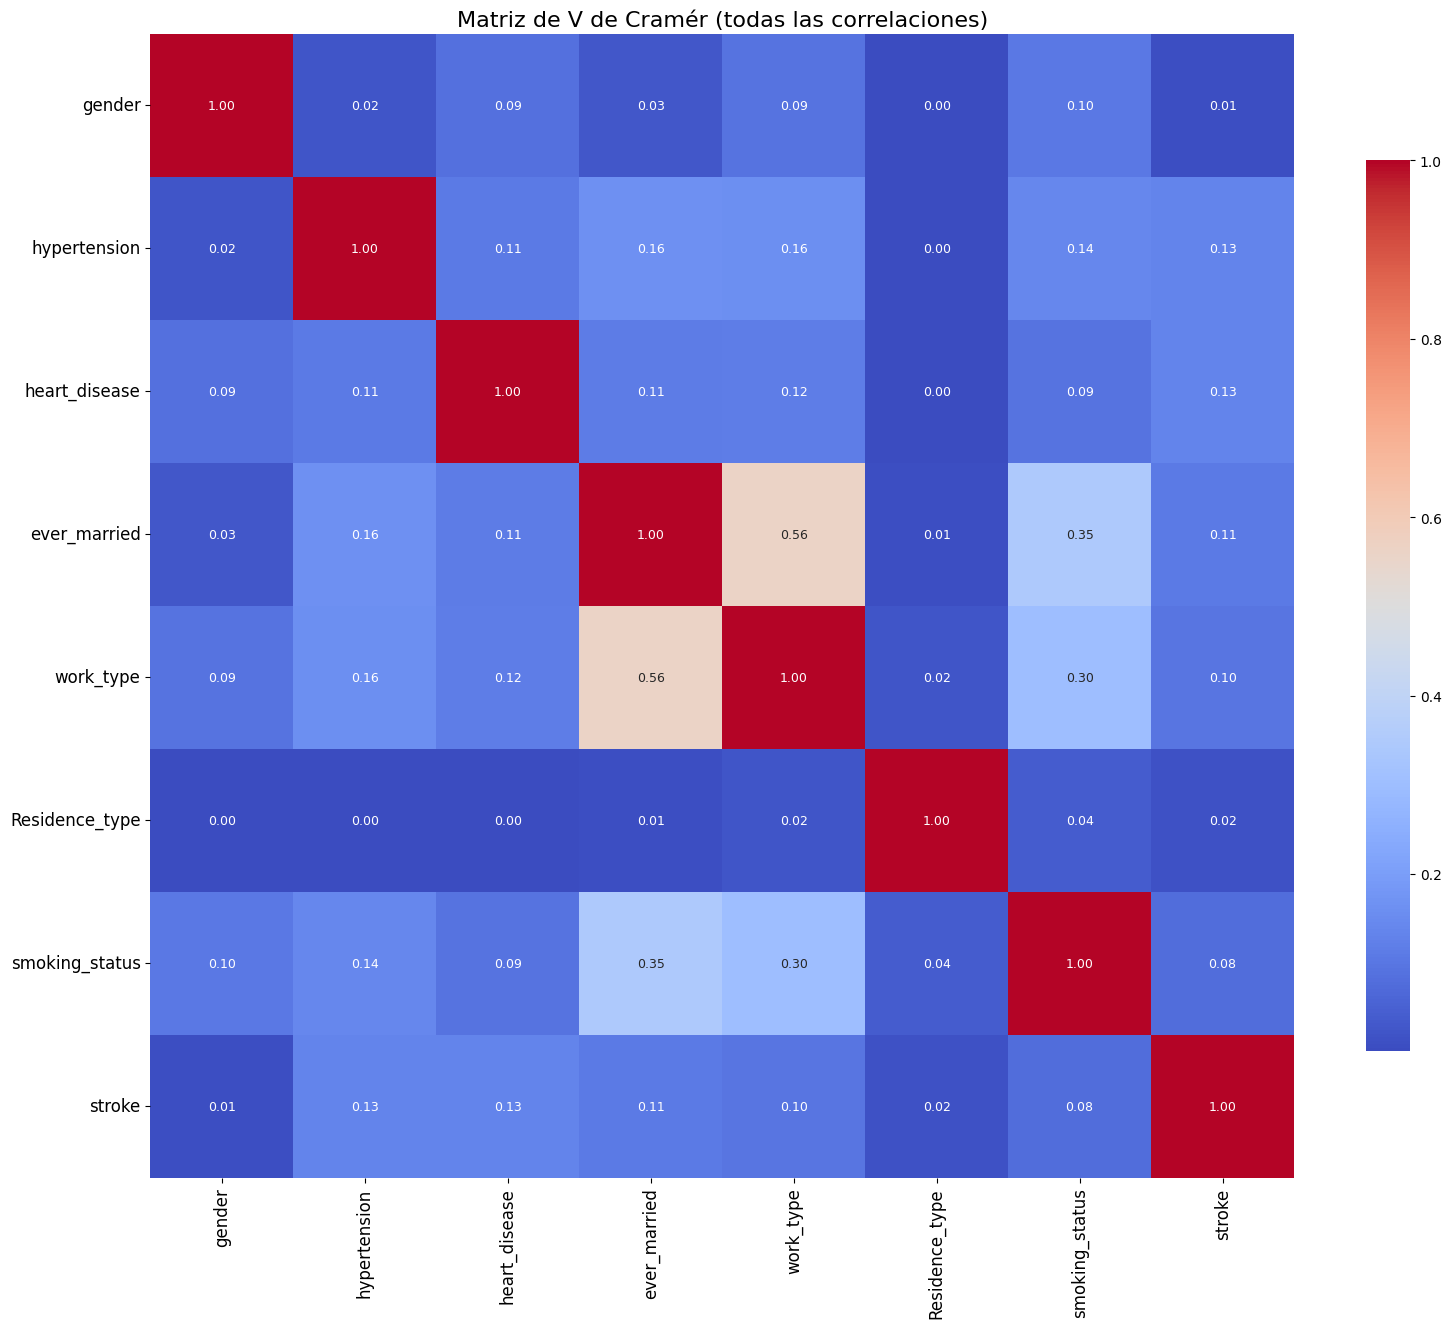

In [46]:
from itertools import combinations
from scipy.stats import chi2_contingency

# Función para calcular V de Cramér
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

# Variables seleccionadas
selected_vars = [
    'gender', 'hypertension', 'heart_disease', 'ever_married',
    'work_type', 'Residence_type', 'smoking_status', 'stroke'
]

# Filtrar DataFrame con las variables seleccionadas
df_subset = df[selected_vars]

# Crear matriz vacía para guardar los resultados
matrix = pd.DataFrame(index=selected_vars, columns=selected_vars)

# Calcular V de Cramér para cada par de variables
for var1, var2 in combinations(selected_vars, 2):
    contingency_table = pd.crosstab(df_subset[var1], df_subset[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value

# Asignar 1s en la diagonal
np.fill_diagonal(matrix.values, 1)

# Convertir la matriz a tipo float
matrix = matrix.astype(float)

# Visualizar heatmap completo
plt.figure(figsize=(16, 14))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            annot_kws={"size": 9}, cbar_kws={"shrink": 0.7})
plt.title("Matriz de V de Cramér (todas las correlaciones)", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

### 🎯 Resultados Destacados
A continuación se describen las asociaciones más relevantes encontradas:

- La asociación más alta se observa entre ever_married y work_type con un valor de V = 0.56, lo que indica una moderada asociación.

- También se destaca una correlación moderada entre ever_married y smoking_status (V = 0.35).

- En general, la mayoría de las variables tienen baja o nula asociación entre sí (V < 0.2).

- Variables como Residence_type, gender y stroke presentan muy bajas asociaciones con las demás.

### 📉 Interpretación General
Los resultados sugieren que la mayoría de las variables categóricas evaluadas no están fuertemente asociadas entre sí, lo que indica que estas aportan información independiente dentro del conjunto de datos. Las únicas asociaciones moderadas podrían ser útiles para análisis posteriores o para interpretar posibles patrones sociodemográficos.

# Analisis de outliers

### 1. Identificar columnas numéricas:
Se seleccionan las columnas que contienen datos numéricos para analizar.

In [47]:
# Paso 1: Identificar columnas numéricas
numeric_columns = ['age', 'avg_glucose_level', 'bmi'] 

### 2. Visualizar outliers: 
Se generan gráficos tipo boxplot para identificar visualmente los valores extremos.

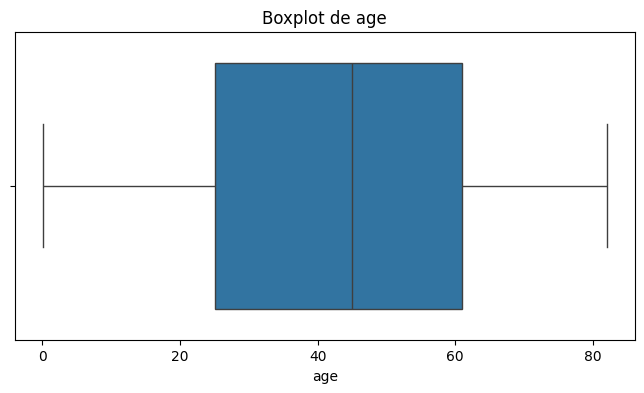

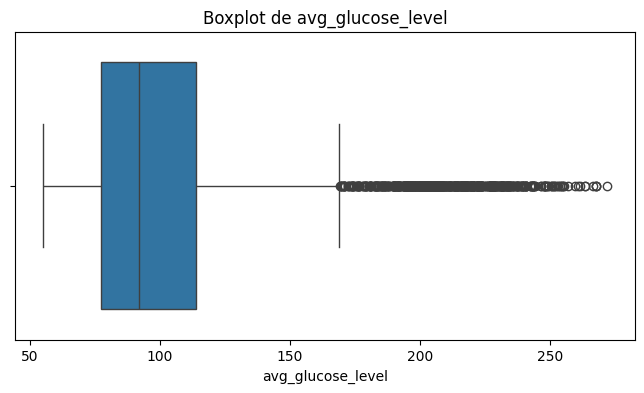

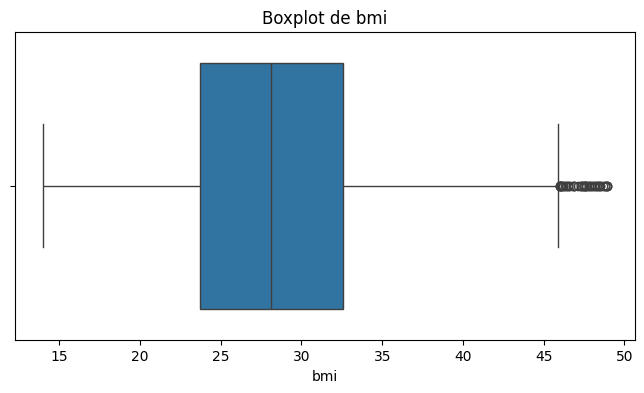

In [48]:
# Paso 2: Visualizar outliers con gráficos
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot de {column}')
    plt.show()

### 3. Calcular límites de outliers: 
Se usa el rango intercuartílico (IQR) para calcular los límites inferior y superior.

In [49]:
# Paso 3: Calcular límites de outliers usando IQR
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)  # Primer cuartil
    Q3 = df[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico

    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    print(f'Columna: {column}')
    print(f'Límite inferior: {lower_bound}')
    print(f'Límite superior: {upper_bound}')

    # Identificar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f'Outliers en {column}:')
    print(outliers[column])
    print('-' * 50)

Columna: age
Límite inferior: -29.0
Límite superior: 115.0
Outliers en age:
Series([], Name: age, dtype: float64)
--------------------------------------------------
Columna: avg_glucose_level
Límite inferior: 22.28500000000001
Límite superior: 168.805
Outliers en avg_glucose_level:
0       228.69
2       171.23
3       174.12
4       186.21
11      214.09
         ...  
4968    206.53
4970    240.69
4972    238.27
4975    215.07
4977    191.15
Name: avg_glucose_level, Length: 602, dtype: float64
--------------------------------------------------
Columna: bmi
Límite inferior: 10.349999999999996
Límite superior: 45.95
Outliers en bmi:
17      48.9
53      47.5
154     46.0
295     48.2
319     47.3
366     46.5
368     46.6
560     47.8
760     46.1
1142    48.4
1167    46.2
1411    47.5
1452    48.5
1833    48.9
2105    48.5
2116    48.7
2135    48.9
2213    46.5
2231    48.8
2453    46.0
2673    48.0
2683    46.8
2807    48.3
3067    48.3
3341    47.4
3649    47.3
3683    47.9
3755    

### 4. Usar ZScore

In [50]:
from scipy.stats import zscore

# Calcular Z-score para las columnas relevantes
df['zscore_age'] = zscore(df['age'])
df['zscore_avg_glucose_level'] = zscore(df['avg_glucose_level'])
df['zscore_bmi'] = zscore(df['bmi'])

# Identificar outliers usando Z-score (umbral: |Z| > 3)
zscore_outliers_age = df[(df['zscore_age'].abs() > 3)]
zscore_outliers_glucose = df[(df['zscore_avg_glucose_level'].abs() > 3)]
zscore_outliers_bmi = df[(df['zscore_bmi'].abs() > 3)]

print("Número de outliers detectados usando Z-score:")
print(f"Age: {len(zscore_outliers_age)}")
print(f"Avg Glucose Level: {len(zscore_outliers_glucose)}")
print(f"BMI: {len(zscore_outliers_bmi)}")

Número de outliers detectados usando Z-score:
Age: 0
Avg Glucose Level: 49
BMI: 3


In [51]:
# Comparación: Outliers detectados por IQR vs Z-score
print("=== COMPARACIÓN DE MÉTODOS DE DETECCIÓN ===")
print("Método IQR:")
print("- avg_glucose_level: 602 outliers")
print("- bmi: 43 outliers") 
print("- age: 0 outliers")

print("\nMétodo Z-score:")
print(f"- avg_glucose_level: {len(zscore_outliers_glucose)} outliers")
print(f"- bmi: {len(zscore_outliers_bmi)} outliers")
print(f"- age: {len(zscore_outliers_age)} outliers")

print("\nConclusión: El método IQR es más sensible y detecta más outliers que Z-score.")

=== COMPARACIÓN DE MÉTODOS DE DETECCIÓN ===
Método IQR:
- avg_glucose_level: 602 outliers
- bmi: 43 outliers
- age: 0 outliers

Método Z-score:
- avg_glucose_level: 49 outliers
- bmi: 3 outliers
- age: 0 outliers

Conclusión: El método IQR es más sensible y detecta más outliers que Z-score.


### 5. Tratamiento de Outliers con IQR y Zscore

#### 5.1 Definición de funciones

In [52]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Tratar outliers con IQR (Winsorización)
def treat_outliers_iqr(data, column):
    """
    Aplica winsorización usando el método IQR.
    Los valores fuera del rango [Q1-1.5*IQR, Q3+1.5*IQR] se reemplazan por los límites.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Winsorización: reemplazar valores extremos por los límites
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Tratar outliers con Z-score
def treat_outliers_zscore(data, column, threshold=3):
    """
    Aplica winsorización usando Z-score.
    Los valores con |Z| > threshold se reemplazan por los límites correspondientes.
    """
    mean = data[column].mean()
    std_dev = data[column].std()
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    
    # Winsorización: reemplazar valores extremos por los límites
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

### 5.2 Funciones de Análisis

In [53]:
# Función para comparar outliers antes del tratamiento
def compare_outliers(data, columns):
    """Compara outliers detectados por métodos IQR y Z-score."""
    result = pd.DataFrame(index=columns, columns=['IQR_outliers', 'Zscore_outliers'])
    
    for col in columns:
        # Outliers por IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        iqr_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        
        # Outliers por Z-score
        z_scores = zscore(data[col])
        zs_outliers = data[abs(z_scores) > 3]
        
        result.loc[col, 'IQR_outliers'] = len(iqr_outliers)
        result.loc[col, 'Zscore_outliers'] = len(zs_outliers)
        
    return result

# Función para tratar todo el dataset
def treat_dataset_outliers(data, numeric_columns):
    """
    Aplica tratamiento de outliers (winsorización) a las columnas numéricas especificadas.
    Primero aplica IQR, luego Z-score.
    """
    treated_data = data.copy()
    for column in numeric_columns:
        print(f"Tratando outliers en: {column}")
        treated_data = treat_outliers_iqr(treated_data, column)
        treated_data = treat_outliers_zscore(treated_data, column)
    return treated_data

### 5.3 Función de Verificación

In [54]:
# Función para verificar que el tratamiento funcionó
def verify_outlier_treatment(original_df, treated_df, columns):
    """Verifica que los outliers hayan sido tratados comparando min/max."""
    print("=== VERIFICACIÓN DEL TRATAMIENTO DE OUTLIERS ===")
    for col in columns:
        print(f"\nColumna: {col}")
        print(f"Original - Min: {original_df[col].min():.2f}, Max: {original_df[col].max():.2f}")
        print(f"Tratado  - Min: {treated_df[col].min():.2f}, Max: {treated_df[col].max():.2f}")
        
        # Verificar si hubo cambios
        min_changed = original_df[col].min() != treated_df[col].min()
        max_changed = original_df[col].max() != treated_df[col].max()
        
        if min_changed or max_changed:
            print(f"✅ VALORES MODIFICADOS en {col}")
        else:
            print(f"❌ No se detectaron cambios en {col}")
        print("-" * 50)

### 5.4 Aplicación del Tratamiento

In [55]:
# APLICACIÓN DEL TRATAMIENTO DE OUTLIERS
# Definir columnas numéricas
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

# Leer datos frescos (sin modificaciones previas)
df_clean = pd.read_csv('../data/stroke_dataset.csv')

print("=== ANÁLISIS DE OUTLIERS ANTES DEL TRATAMIENTO ===")
print(f"Tamaño del dataset: {df_clean.shape}")

# Comparar métodos de detección de outliers
print("\nComparativa de outliers detectados:")
comparison = compare_outliers(df_clean, numeric_columns)
print(comparison)

# Hacer copia para comparación
original_copy = df_clean.copy()

# Aplicar tratamiento de outliers
print("\n=== APLICANDO TRATAMIENTO DE OUTLIERS ===")
treated_df = treat_dataset_outliers(df_clean, numeric_columns)

# Verificar que el tratamiento funcionó
verify_outlier_treatment(original_copy, treated_df, numeric_columns)

=== ANÁLISIS DE OUTLIERS ANTES DEL TRATAMIENTO ===
Tamaño del dataset: (4981, 11)

Comparativa de outliers detectados:
                  IQR_outliers Zscore_outliers
age                          0               0
avg_glucose_level          602              49
bmi                         43               3

=== APLICANDO TRATAMIENTO DE OUTLIERS ===
Tratando outliers en: age
Tratando outliers en: avg_glucose_level
Tratando outliers en: bmi
=== VERIFICACIÓN DEL TRATAMIENTO DE OUTLIERS ===

Columna: age
Original - Min: 0.08, Max: 82.00
Tratado  - Min: 0.08, Max: 82.00
❌ No se detectaron cambios en age
--------------------------------------------------

Columna: avg_glucose_level
Original - Min: 55.12, Max: 271.74
Tratado  - Min: 55.12, Max: 168.81
✅ VALORES MODIFICADOS en avg_glucose_level
--------------------------------------------------

Columna: bmi
Original - Min: 14.00, Max: 48.90
Tratado  - Min: 14.00, Max: 45.95
✅ VALORES MODIFICADOS en bmi
-----------------------------------------

### 5.5 Resultados Finales

In [56]:
# RESULTADOS FINALES Y GUARDADO
print(f"\n=== RESULTADOS FINALES ===")
print(f"Tamaño original: {original_copy.shape}")
print(f"Tamaño después del tratamiento: {treated_df.shape}")
print("Nota: El tamaño no cambia porque aplicamos winsorización (reemplazo) en lugar de eliminación")

# Guardar dataset tratado
treated_df.to_csv('../data/dataset_tratado.csv', index=False)
print(f"\n✅ Dataset tratado guardado como 'dataset_tratado.csv'")

# Mostrar estadísticas antes y después
print("\n=== ESTADÍSTICAS COMPARATIVAS ===")
for col in numeric_columns:
    print(f"\n{col.upper()}:")
    print(f"Original - Media: {original_copy[col].mean():.2f}, Std: {original_copy[col].std():.2f}")
    print(f"Tratado  - Media: {treated_df[col].mean():.2f}, Std: {treated_df[col].std():.2f}")


=== RESULTADOS FINALES ===
Tamaño original: (4981, 11)
Tamaño después del tratamiento: (4981, 11)
Nota: El tamaño no cambia porque aplicamos winsorización (reemplazo) en lugar de eliminación

✅ Dataset tratado guardado como 'dataset_tratado.csv'

=== ESTADÍSTICAS COMPARATIVAS ===

AGE:
Original - Media: 43.42, Std: 22.66
Tratado  - Media: 43.42, Std: 22.66

AVG_GLUCOSE_LEVEL:
Original - Media: 105.94, Std: 45.08
Tratado  - Media: 100.79, Std: 32.94

BMI:
Original - Media: 28.50, Std: 6.79
Tratado  - Media: 28.49, Std: 6.76


# Conclusiones del EDA

## 🎯 Hallazgos Principales

### Variables Predictivas Identificadas:
- **Altamente significativas**: age, avg_glucose_level, bmi, hypertension, heart_disease, ever_married, work_type, smoking_status
- **No significativas**: gender, Residence_type

### Características del Dataset:
- **Sin valores faltantes**: Dataset completo, listo para modelado
- **Desbalance de clases**: 95.1% sin stroke vs 4.9% con stroke
- **Outliers tratados**: Aplicada winsorización para preservar datos

### Preparación para Modelado:
- ✅ Dataset limpio guardado como 'dataset_tratado.csv'
- ✅ Variables significativas identificadas
- ✅ Necesidad de técnicas de balanceo de clases confirmada